In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('car_price.csv')

In [7]:
import pyspark

ValueError: Couldn't find Spark, make sure SPARK_HOME env is set or Spark is in an expected location (e.g. from homebrew installation).

In [ ]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [ ]:
print(raw_data[['Brand','Price']].groupby(['Brand'], as_index=False).mean())

           Brand         Price
0           Audi  18489.633484
1            BMW  23525.368087
2  Mercedes-Benz  30608.048122
3     Mitsubishi  11295.713003
4        Renault   8035.127018
5         Toyota  22591.220287
6     Volkswagen  13125.267930


In [ ]:
print(raw_data[['Body','Price']].groupby(['Body'], as_index=False).mean())

        Body         Price
0  crossover  37899.192857
1      hatch  10085.765484
2      other  22471.287560
3      sedan  15577.630387
4      vagon   9973.878641
5        van  12641.511495


In [ ]:
print(raw_data[['Engine Type','Price']].groupby(['Engine Type'], as_index=False).mean())

  Engine Type         Price
0      Diesel  20203.661177
1         Gas  12213.170132
2       Other  16512.686667
3      Petrol  21604.213765


In [ ]:
print(raw_data[['Registration','Price']].groupby(['Registration'], as_index=False).mean())

  Registration         Price
0           no   4224.137056
1          yes  21002.942831


In [ ]:
data_no_mv= raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


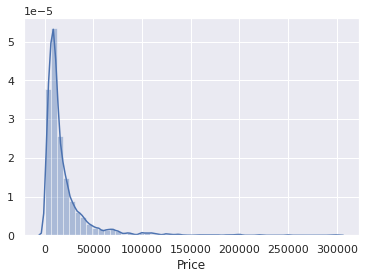

In [ ]:
sns.distplot(data_no_mv['Price'])

In [ ]:
q= data_no_mv['Price'].quantile(0.95)
data1= data_no_mv[data_no_mv['Price']<q]

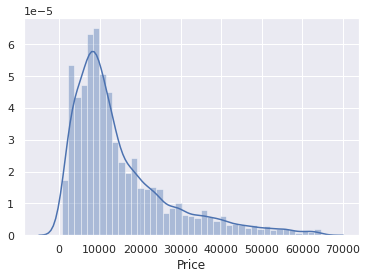

In [ ]:
sns.distplot(data1['Price'])

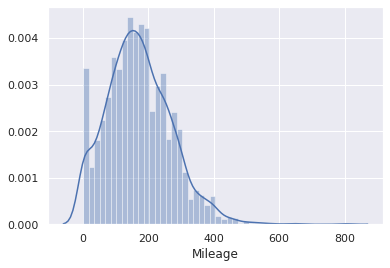

In [ ]:
sns.distplot(data1['Mileage'])

In [ ]:
q= data1['Mileage'].quantile(0.99)
data2= data1[data1['Mileage']<q]

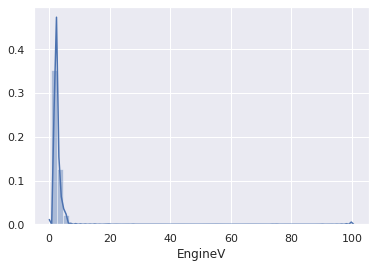

In [ ]:
sns.distplot(data2['EngineV'])

In [ ]:
data3=data2[data2['EngineV']<6.5]

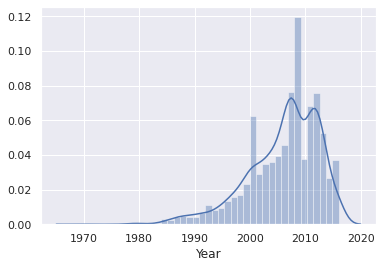

In [ ]:
sns.distplot(data3['Year'])

In [ ]:
q= data3['Year'].quantile(0.01)
data4= data3[data3['Year']>q]

In [ ]:
current_year=2020
data4['Year_count']=data4['Year'] - current_year 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_cleaned=data4.reset_index(drop=True)

In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Year_count
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000,3707,3707.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,282,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,840,NaN,1430,NaN,NaN,1695,3345,NaN,181,NaN
mean,NaN,15206.739496,NaN,166.731589,2.408435,NaN,NaN,2006.360399,NaN,-13.639601
std,NaN,12213.872637,NaN,92.674124,0.920792,NaN,NaN,5.982401,NaN,5.982401
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,-32.000000
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000,NaN,-17.000000
50%,NaN,11115.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN,-13.000000
75%,NaN,19750.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN,-9.000000


In [ ]:
dfcbsdyj{]9089}\\\\()

SyntaxError: ignored

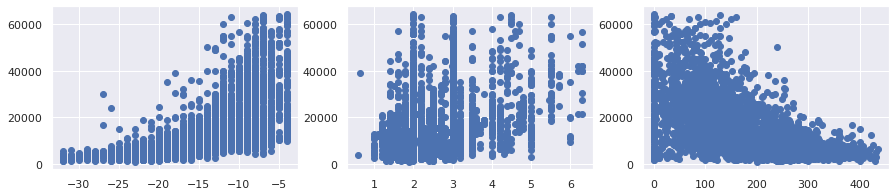

In [ ]:
f, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,3))
ax1.scatter(data_cleaned['Year_count'], data_cleaned['Price'])
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])

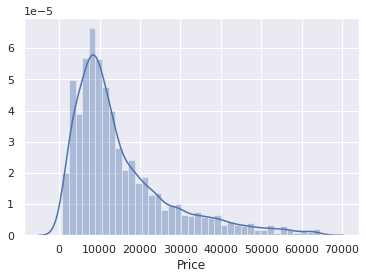

In [ ]:
sns.distplot(data_cleaned['Price'])

In [ ]:
log_price= np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price

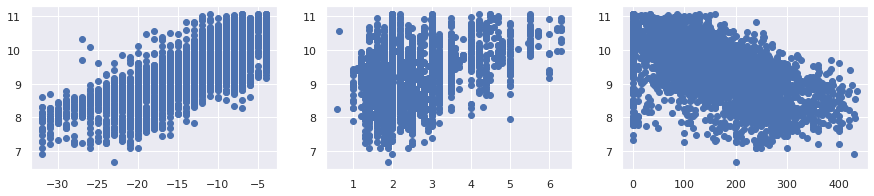

In [ ]:
f, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,3))
ax1.scatter(data_cleaned['Year_count'], data_cleaned['log_price'])
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])

In [ ]:
data_cleaned=data_cleaned.drop(['Price','Year'],axis=1)

In [ ]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model', 'Year_count', 'log_price'], dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year_count', 'EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,8.034341,Mileage
1,10.074761,Year_count
2,4.062473,EngineV


In [ ]:
import statsmodels.api as sm
x=data_cleaned[['Mileage','Year_count','EngineV']]
y=data_cleaned['log_price']

In [ ]:
x=sm.add_constant(x)
model= sm.OLS(y,x).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     3240.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:17:32   Log-Likelihood:                -2016.4
No. Observations:                3707   AIC:                             4041.
Df Residuals:                    3703   BIC:                             4066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8308      0.024    410.110      0.000       9.784       9.878
Mileage       -0.0011      0.000    -10.674      0.000      -0.001      -0.001
Year_count     0.0895      0.002     56.568      0.000       0.086       0.093
EngineV        0.3749      0.007     50.206      0.000       0.360       0.389
==============================================================================
Omnibus:                       75.870   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.253
Skew:                          -0.349   Prob(JB):                     3.74e-18
Kurtosis:                       3.181   Cond. No.                         686.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x.iloc[:,1:].corr()

,Mileage,Year_count,EngineV
Mileage,1.000000,-0.689017,0.073864
Year_count,-0.689017,1.000000,-0.077668
EngineV,0.073864,-0.077668,1.000000


In [ ]:
for col in data_cleaned.columns :
  print(col, ':' ,len(data_cleaned[col].unique()))

Brand : 7
Body : 6
Mileage : 375
EngineV : 54
Engine Type : 4
Registration : 2
Model : 282
Year_count : 29
log_price : 752


In [ ]:
data_cleaned.Model.value_counts().sort_values(ascending=False).head(50)

E-Class               181
Vito                  154
A6                    153
Kangoo                132
Camry                 127
Caddy                 110
X5                     90
Megane                 85
Land Cruiser Prado     75
520                    74
Trafic                 70
Passat B6              61
Polo                   59
Touareg                59
320                    56
T5 (Transporter)       55
A4                     54
Passat B5              54
C-Class                51
525                    51
Q7                     51
Rav 4                  50
Lancer X               49
530                    49
Lancer                 49
Passat B7              48
Pajero Wagon           48
Corolla                46
Jetta                  38
T4 (Transporter)       37
S 500                  37
T5 (Transporter)       35
Avensis                29
X6                     29
Auris                  28
318                    28
Laguna                 27
Outlander              27
Pajero Sport

In [ ]:
top_50= [x for x in data_cleaned.Model.value_counts().sort_values(ascending=False).head(50).index]
top_50

['E-Class',
 'Vito',
 'A6',
 'Kangoo',
 'Camry',
 'Caddy',
 'X5',
 'Megane',
 'Land Cruiser Prado',
 '520',
 'Trafic',
 'Passat B6',
 'Polo',
 'Touareg',
 '320',
 'T5 (Transporter)',
 'A4',
 'Passat B5',
 'C-Class',
 '525',
 'Q7',
 'Rav 4',
 'Lancer X',
 '530',
 'Lancer',
 'Passat B7',
 'Pajero Wagon',
 'Corolla',
 'Jetta',
 'T4 (Transporter)',
 'S 500',
 'T5 (Transporter) ',
 'Avensis',
 'X6',
 'Auris',
 '318',
 'Laguna',
 'Outlander',
 'Pajero Sport',
 'Galant',
 'A8',
 '730',
 'Golf IV',
 'Outlander XL',
 'Scenic',
 'A6 Allroad',
 'ML 350',
 'Passat CC',
 'Touran',
 'Multivan']

In [ ]:
data_model= pd.DataFrame()
for label in top_50:
  data_model[label] = np.where(data_cleaned['Model']==label,1,0)
#data_cleaned[['Model']+top_50]
data_model

,E-Class,Vito,A6,Kangoo,Camry,Caddy,X5,Megane,Land Cruiser Prado,520,Trafic,Passat B6,Polo,Touareg,320,T5 (Transporter),A4,Passat B5,C-Class,525,Q7,Rav 4,Lancer X,530,Lancer,Passat B7,Pajero Wagon,Corolla,Jetta,T4 (Transporter),S 500,T5 (Transporter),Avensis,X6,Auris,318,Laguna,Outlander,Pajero Sport,Galant,A8,730,Golf IV,Outlander XL,Scenic,A6 Allroad,ML 350,Passat CC,Touran,Multivan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_model.shape

(3707, 50)

In [ ]:
data_clean=data_cleaned.drop(['Brand','Model'], axis=1)
data_clean

,Body,Mileage,EngineV,Engine Type,Registration,Year_count,log_price
0,sedan,277,2.0,Petrol,yes,-29,8.342840
1,van,427,2.9,Diesel,yes,-21,8.974618
2,sedan,358,5.0,Gas,yes,-17,9.495519
3,crossover,240,4.2,Petrol,yes,-13,10.043249
4,crossover,120,2.0,Petrol,yes,-9,9.814656
...,...,...,...,...,...,...,...
3702,sedan,152,1.6,Petrol,yes,-13,8.824678
3703,van,163,2.5,Diesel,yes,-12,9.350102
3704,sedan,35,1.6,Petrol,yes,-6,9.792556
3705,sedan,1,3.5,Petrol,yes,-21,8.779557


In [ ]:
data_dummies= pd.get_dummies(data_clean,drop_first=True)
data_dummies

,Mileage,EngineV,Year_count,log_price,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,-29,8.342840,0,0,1,0,0,0,0,1,1
1,427,2.9,-21,8.974618,0,0,0,0,1,0,0,0,1
2,358,5.0,-17,9.495519,0,0,1,0,0,1,0,0,1
3,240,4.2,-13,10.043249,0,0,0,0,0,0,0,1,1
4,120,2.0,-9,9.814656,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,152,1.6,-13,8.824678,0,0,1,0,0,0,0,1,1
3703,163,2.5,-12,9.350102,0,0,0,0,1,0,0,0,1
3704,35,1.6,-6,9.792556,0,0,1,0,0,0,0,1,1
3705,1,3.5,-21,8.779557,0,0,1,0,0,0,0,1,1


In [ ]:
data_with_dummie=pd.concat([data_dummies,data_model], axis=1)
data_with_dummie

,Mileage,EngineV,Year_count,log_price,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,E-Class,Vito,A6,Kangoo,Camry,Caddy,X5,Megane,Land Cruiser Prado,520,Trafic,Passat B6,Polo,Touareg,320,T5 (Transporter),A4,Passat B5,C-Class,525,Q7,Rav 4,Lancer X,530,Lancer,Passat B7,Pajero Wagon,Corolla,Jetta,T4 (Transporter),S 500,T5 (Transporter),Avensis,X6,Auris,318,Laguna,Outlander,Pajero Sport,Galant,A8,730,Golf IV,Outlander XL,Scenic,A6 Allroad,ML 350,Passat CC,Touran,Multivan
0,277,2.0,-29,8.342840,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,427,2.9,-21,8.974618,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,358,5.0,-17,9.495519,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,240,4.2,-13,10.043249,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,120,2.0,-9,9.814656,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,152,1.6,-13,8.824678,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3703,163,2.5,-12,9.350102,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3704,35,1.6,-6,9.792556,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3705,1,3.5,-21,8.779557,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_with_dummie.columns.values

array(['Mileage', 'EngineV', 'Year_count', 'log_price', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'E-Class', 'Vito', 'A6', 'Kangoo', 'Camry',
       'Caddy', 'X5', 'Megane', 'Land Cruiser Prado', '520', 'Trafic',
       'Passat B6', 'Polo', 'Touareg', '320', 'T5 (Transporter)', 'A4',
       'Passat B5', 'C-Class', '525', 'Q7', 'Rav 4', 'Lancer X', '530',
       'Lancer', 'Passat B7', 'Pajero Wagon', 'Corolla', 'Jetta',
       'T4 (Transporter)', 'S 500', 'T5 (Transporter) ', 'Avensis', 'X6',
       'Auris', '318', 'Laguna', 'Outlander', 'Pajero Sport', 'Galant',
       'A8', '730', 'Golf IV', 'Outlander XL', 'Scenic', 'A6 Allroad',
       'ML 350', 'Passat CC', 'Touran', 'Multivan'], dtype=object)

In [ ]:
cols=['log_price', 'Mileage', 'EngineV', 'Year_count', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'E-Class', 'Vito', 'A6', 'Kangoo', 'Camry',
       'Caddy', 'X5', 'Megane', 'Land Cruiser Prado', '520', 'Trafic',
       'Passat B6', 'Polo', 'Touareg', '320', 'T5 (Transporter)',
       'Passat B5', 'A4', 'C-Class', 'Q7', '525', 'Rav 4', 'Lancer',
       '530', 'Lancer X', 'Passat B7', 'Pajero Wagon', 'Corolla', 'Jetta',
       'T4 (Transporter)', 'S 500', 'T5 (Transporter) ', 'Avensis', 'X6',
       '318', 'Auris', 'Laguna', 'Outlander', 'Galant', 'Pajero Sport',
       'A8', 'Golf IV', '730', 'Outlander XL', 'Scenic', 'A6 Allroad',
       'ML 350', 'Passat CC', 'Touran', 'Multivan']

In [ ]:
data_preprocessed= data_with_dummie[cols]
data_preprocessed

,log_price,Mileage,EngineV,Year_count,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,E-Class,Vito,A6,Kangoo,Camry,Caddy,X5,Megane,Land Cruiser Prado,520,Trafic,Passat B6,Polo,Touareg,320,T5 (Transporter),Passat B5,A4,C-Class,Q7,525,Rav 4,Lancer,530,Lancer X,Passat B7,Pajero Wagon,Corolla,Jetta,T4 (Transporter),S 500,T5 (Transporter),Avensis,X6,318,Auris,Laguna,Outlander,Galant,Pajero Sport,A8,Golf IV,730,Outlander XL,Scenic,A6 Allroad,ML 350,Passat CC,Touran,Multivan
0,8.342840,277,2.0,-29,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,-21,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,-17,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,-13,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,-9,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,8.824678,152,1.6,-13,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3703,9.350102,163,2.5,-12,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3704,9.792556,35,1.6,-6,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3705,8.779557,1,3.5,-21,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
targets=data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
inputs_scaled = scaler.transform(inputs)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [ ]:
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat = reg.predict(x_train)

(6.0, 13.0)

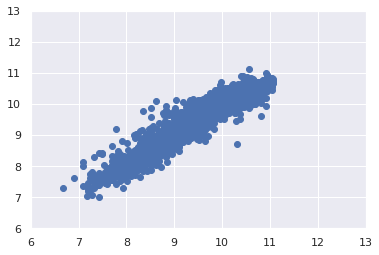

In [ ]:
plt.scatter(y_train, yhat)
plt.xlim(6,13)
plt.ylim(6,13)

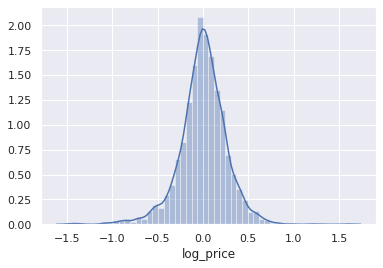

In [ ]:
sns.distplot(y_train-yhat)

In [ ]:
r2 = reg.score(x_train,y_train)
r2

0.8943910912229549

In [ ]:
n= x_train.shape[0]
p= x_train.shape[1]
adj_r2=1 - (1- r2) * (n-1)/(n-p-1)
adj_r2 

0.8921348016488071

In [ ]:
score=pd.DataFrame()
score['Variable']=['r2','adj r2']
score['Score']=(round(float(r2)*100,2) , round(float(adj_r2)*100,2))
score

,Variable,Score
0,r2,89.44
1,adj r2,89.21


In [ ]:
reg.intercept_

9.333651683033754

In [ ]:
reg.coef_

array([-6.00423905e-02,  2.15805200e-01,  4.96825912e-01, -8.08622407e-02,
       -4.74072865e-02, -1.12450073e-01, -9.32926246e-02, -1.04001344e-01,
       -4.32729183e-02, -9.38228189e-03, -4.41461776e-02,  2.59919587e-01,
        2.46543660e-02, -3.31237343e-02,  1.31622593e-02, -1.38772135e-01,
       -2.08772163e-02, -8.18244168e-02,  1.93934057e-02, -5.54982185e-02,
        1.01219883e-02,  5.33950850e-02, -5.48056190e-02, -1.65354048e-02,
       -5.88047004e-02,  1.73362411e-03,  1.97139352e-02, -1.73737210e-02,
       -7.46991462e-03,  5.60028693e-03,  2.26567396e-02,  1.72572856e-02,
        1.02024031e-02, -1.24115778e-02, -5.11887879e-02,  7.68971537e-03,
       -4.80985139e-02,  6.28996333e-03, -2.76410918e-02, -2.45112621e-02,
       -1.45646551e-02,  7.11330463e-03, -4.95437345e-03, -3.12604929e-02,
       -9.46396779e-03,  2.80787842e-02,  1.15434342e-02, -1.48381331e-02,
       -2.28123496e-02, -3.43323648e-02, -1.99720756e-02, -3.36626856e-02,
        7.92826834e-03, -

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']= reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.060042
1,EngineV,0.215805
2,Year_count,0.496826
3,Body_hatch,-0.080862
4,Body_other,-0.047407
...,...,...
57,A6 Allroad,0.012124
58,ML 350,0.006975
59,Passat CC,0.011723
60,Touran,-0.000251


(6.0, 13.0)

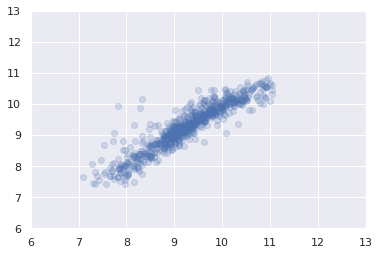

In [ ]:
yhat_test=reg.predict(x_test)
plt.scatter(y_test,yhat_test, alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)

In [ ]:
reg.score(x_test,y_test)

0.8528903407116869

In [ ]:
df_pf=pd.DataFrame(np.exp(yhat_test), columns=['Predictions'])
df_pf['Targets']=np.exp(y_test)
df_pf

,Predictions,Targets
0,16065.841482,NaN
1,6120.094768,NaN
2,27274.064487,NaN
3,25197.815812,NaN
4,4714.620548,NaN
...,...,...
737,9767.777672,NaN
738,9877.473440,NaN
739,34845.322018,NaN
740,5149.789104,NaN


In [ ]:
y_test

532      9.738023
18       8.922658
843      9.825526
3291     9.998798
926      8.594154
          ...    
1856     9.126959
2095     9.159047
2637    10.609057
333      8.699515
359     10.203592
Name: log_price, Length: 742, dtype: float64

In [ ]:
y_test=y_test.reset_index(drop=True)

In [ ]:
y_test

0       9.738023
1       8.922658
2       9.825526
3       9.998798
4       8.594154
         ...    
737     9.126959
738     9.159047
739    10.609057
740     8.699515
741    10.203592
Name: log_price, Length: 742, dtype: float64

In [ ]:
#df_pf=pd.DataFrame(np.exp(yhat_test), columns=['Predictions'])
df_pf['Targets']=np.exp(y_test)
df_pf

,Predictions,Targets
0,16065.841482,16950.0
1,6120.094768,7500.0
2,27274.064487,18500.0
3,25197.815812,22000.0
4,4714.620548,5400.0
...,...,...
737,9767.777672,9200.0
738,9877.473440,9500.0
739,34845.322018,40500.0
740,5149.789104,6000.0


In [ ]:
df_pf['Residual']=df_pf['Targets']- df_pf['Predictions']
df_pf

,Predictions,Targets,Residual
0,16065.841482,16950.0,884.158518
1,6120.094768,7500.0,1379.905232
2,27274.064487,18500.0,-8774.064487
3,25197.815812,22000.0,-3197.815812
4,4714.620548,5400.0,685.379452
...,...,...,...
737,9767.777672,9200.0,-567.777672
738,9877.473440,9500.0,-377.473440
739,34845.322018,40500.0,5654.677982
740,5149.789104,6000.0,850.210896


In [ ]:
df_pf['Difference%']= np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Predictions,Targets,Residual,Difference%
0,16065.841482,16950.0,884.158518,5.216274
1,6120.094768,7500.0,1379.905232,18.398736
2,27274.064487,18500.0,-8774.064487,47.427376
3,25197.815812,22000.0,-3197.815812,14.535526
4,4714.620548,5400.0,685.379452,12.692212
...,...,...,...,...
737,9767.777672,9200.0,-567.777672,6.171496
738,9877.473440,9500.0,-377.473440,3.973405
739,34845.322018,40500.0,5654.677982,13.962168
740,5149.789104,6000.0,850.210896,14.170182


In [ ]:
df_pf.describe()

,Predictions,Targets,Residual,Difference%
count,742.000000,742.00000,742.000000,742.000000
mean,13620.729888,14252.35279,631.622902,23.053675
std,9245.362877,11723.58123,5511.991970,43.170437
min,1660.603774,1200.00000,-22039.611259,0.009333
25%,6797.004315,6762.50000,-1130.574436,5.944271
50%,11073.280269,10500.00000,61.821243,14.586262
75%,18215.546212,17900.00000,1393.418606,26.309660
max,50832.191620,63200.00000,36556.564610,726.150622


In [ ]:
#pd.options.display.max_rows=999
#pd.set_option('display.float_format', lambda x: '%.2f' %x)
#df_pf.sort_values(by=['Difference%'])